In [588]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

*Leitura do dataset.*

In [589]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Entendendo o dataset.*

In [590]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Verificando quantos valores nulos existe no dataset.*

In [591]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Representatividade gráfica.*

<Axes: title={'center': 'REPRESENTATIVIDADE DE NULOS EM %'}>

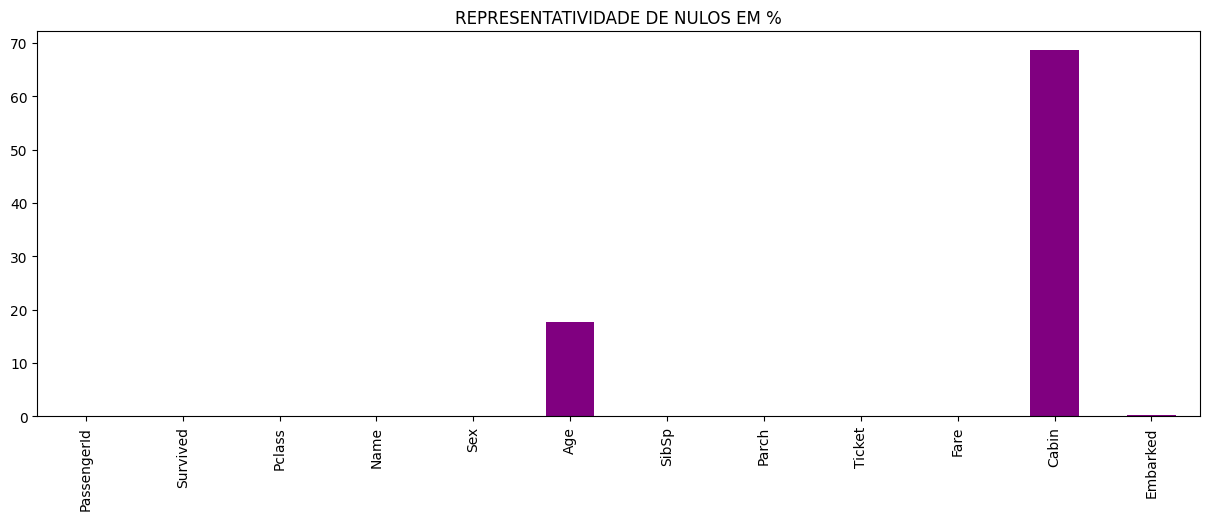

In [592]:
df_representatividade = df.isnull().sum()/10
df_representatividade.plot(kind = 'bar',figsize = (15,5), color = 'purple',title = 'REPRESENTATIVIDADE DE NULOS EM %')

*Deletando as colunas que não serão utilizadas.*

In [593]:
df = df.drop(columns=['PassengerId','Name','Parch','Ticket','Fare','Cabin','SibSp'], axis=1)
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [594]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [595]:
df_embarked = df.loc[df['Embarked'].isna(),'Embarked']
df_embarked

61     NaN
829    NaN
Name: Embarked, dtype: object

*Registros que serão excluídos.*

In [596]:
df.iloc[[61,829]]

,Survived,Pclass,Sex,Age,Embarked
61,1,1,female,38.0,NaN
829,1,1,female,62.0,NaN


*Deletando os registros da coluna "Embarked".*

In [597]:
df = df.dropna(subset=['Embarked'])
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


*Utilizando a média de idade masculina/feminina para prencher os registros NaN.*

In [598]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean').round(0))
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,28.0,S
889,1,1,male,26.0,C


*Transformando as colunas 'Sex' e 'Embarked' em variáveis indicadoras.*

In [599]:
label_encoder = LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2
...,...,...,...,...,...
886,0,2,1,27.0,2
887,1,1,0,19.0,2
888,0,3,0,28.0,2
889,1,1,1,26.0,0


*Calculando a correlação entre as colunas.*

In [600]:
df.corr()

,Survived,Pclass,Sex,Age,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.086641,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.325821,0.164681
Sex,-0.541585,0.127741,1.000000,0.110223,0.110320
Age,-0.086641,-0.325821,0.110223,1.000000,-0.027304
Embarked,-0.169718,0.164681,0.110320,-0.027304,1.000000


*Visualização da correlação em um mapa de calor.*

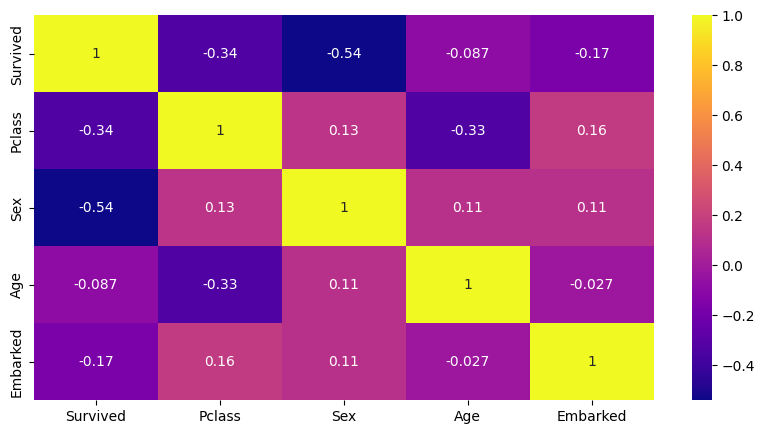

In [601]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()  

In [602]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=42)

*Criando e treinando o modelo.*

In [603]:
modelo = RandomForestClassifier()
modelo.fit(x_train, y_train)

RandomForestClassifier()

*Acurácia.*

In [604]:
modelo.score(x_test, y_test)

0.8146067415730337